## Analysis of Biodiverity in US National Parks

##### This notbook aims to analyze the biodiversity in US National Parks. My data consits of approx 120 000 data entries, where each row represents a specie in a US National forest. The dataset orgins fron US National Park Service.

##### The structure of this Notebook is as follows:
- Prapare the data
- Take a look at Texas US National Forests and compare the number of species. 
- Analyze the total amount of species in US National forests and visulize the result on a map

### Prepare the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packa

In [2]:
# Read files
cols = list(pd.read_csv("species.csv", nrows =1))
print(cols)

df_parks = pd.read_csv('parks.csv')
df_species = pd.read_csv('species.csv', usecols =[i for i in cols if i != 'Unnamed: 13'])

['Species ID', 'Park Name', 'Category', 'Order', 'Family', 'Scientific Name', 'Common Names', 'Record Status', 'Occurrence', 'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status', 'Unnamed: 13']


In [3]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
dtypes: object(13)
memory usage: 11.8+ MB


In [4]:
df_species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [5]:
df_parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [6]:
df_merged = pd.merge(df_species, df_parks, on='Park Name', how='left')
df_merged.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,ACAD,ME,47390,44.35,-68.21
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,ACAD,ME,47390,44.35,-68.21
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,ACAD,ME,47390,44.35,-68.21
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,ACAD,ME,47390,44.35,-68.21
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,ACAD,ME,47390,44.35,-68.21


## Texas US National Forests

In [23]:
df_TX = df_merged.loc[df_merged['State']== 'TX']

In [24]:
df_TX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 4146 to 55947
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species ID           4015 non-null   object 
 1   Park Name            4015 non-null   object 
 2   Category             4015 non-null   object 
 3   Order                3992 non-null   object 
 4   Family               3987 non-null   object 
 5   Scientific Name      4015 non-null   object 
 6   Common Names         4015 non-null   object 
 7   Record Status        4015 non-null   object 
 8   Occurrence           3873 non-null   object 
 9   Nativeness           3873 non-null   object 
 10  Abundance            3592 non-null   object 
 11  Seasonality          899 non-null    object 
 12  Conservation Status  229 non-null    object 
 13  Park Code            4015 non-null   object 
 14  State                4015 non-null   object 
 15  Acres                4015 non-null

In [25]:
# Only include species that are present
df_TX = df_TX[df_TX['Occurrence']=='Present']

In [26]:
df_TX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 4146 to 55947
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species ID           3592 non-null   object 
 1   Park Name            3592 non-null   object 
 2   Category             3592 non-null   object 
 3   Order                3576 non-null   object 
 4   Family               3576 non-null   object 
 5   Scientific Name      3592 non-null   object 
 6   Common Names         3592 non-null   object 
 7   Record Status        3592 non-null   object 
 8   Occurrence           3592 non-null   object 
 9   Nativeness           3592 non-null   object 
 10  Abundance            3592 non-null   object 
 11  Seasonality          899 non-null    object 
 12  Conservation Status  213 non-null    object 
 13  Park Code            3592 non-null   object 
 14  State                3592 non-null   object 
 15  Acres                3592 non-null

In [33]:
TX_group = df_TX.groupby(['Category', 'Park Name']).Category.count().unstack()
TX_group

Park Name,Big Bend National Park,Guadalupe Mountains National Park
Category,,
Amphibian,11.0,9.0
Bird,412.0,240.0
Crab/Lobster/Shrimp,NaN,4.0
Fish,41.0,3.0
Fungi,NaN,65.0
Insect,NaN,80.0
Invertebrate,NaN,3.0
Mammal,80.0,69.0
Nonvascular Plant,47.0,2.0


#### Vizulisation of Textas National Parks

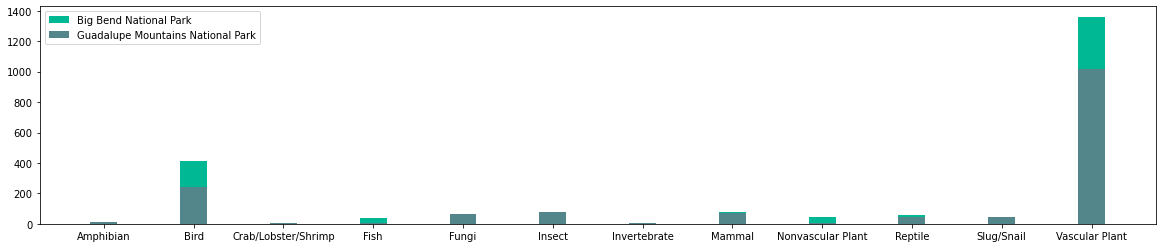

In [38]:
plt.figure(figsize=(20,4))
barWidth = 0.3

plt.bar(TX_group.index, TX_group['Big Bend National Park'], width=barWidth, color='#00b894', label='Big Bend National Park')
plt.bar(TX_group.index, TX_group['Guadalupe Mountains National Park'], width=barWidth, color='#53868B', label='Guadalupe Mountains National Park')
plt.legend()

plt.show()

Text(0, 0.5, 'Number of species')

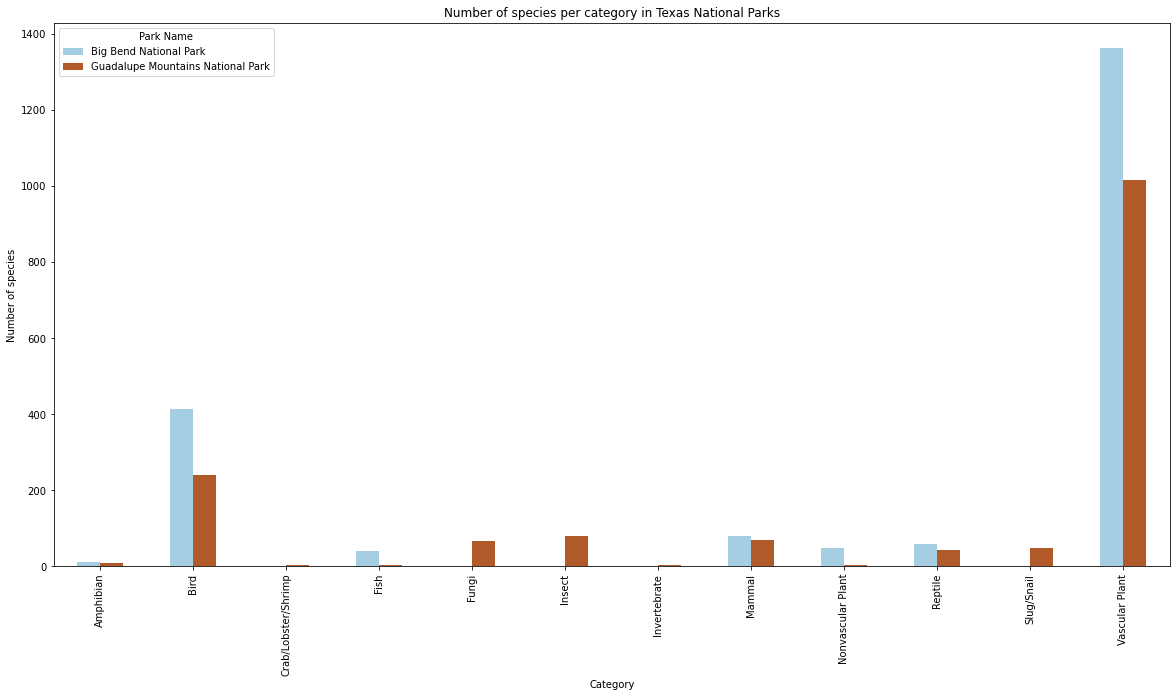

In [55]:
TX_group.plot(kind='bar', stacked=False, figsize=(20,10), colormap='Paired')

plt.title("Number of species per category in Texas National Parks")

plt.xlabel("Category")

plt.ylabel("Number of species")

### Overview of US National Parks

In [63]:
df_merged['count']=1

all_group = df_merged.groupby('Park Name').count()

In [64]:
all_group.head()

,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude,count
Park Name,,,,,,,,,,,,,,,,,,
Acadia National Park,1709,1709,1695,1695,1709,1709,1709,1709,1708,1173,369,75,1709,1709,1709,1709,1709,1709
Arches National Park,1048,1048,1036,1036,1048,1048,1048,1048,1048,737,230,75,1048,1048,1048,1048,1048,1048
Badlands National Park,1389,1389,1366,1365,1389,1389,1389,1129,914,682,236,69,1389,1389,1389,1389,1389,1389
Big Bend National Park,2269,2269,2256,2256,2269,2269,2269,2229,2229,2011,595,138,2269,2269,2269,2269,2269,2269
Biscayne National Park,1726,1726,1721,1720,1726,1726,1726,1613,1613,1331,345,64,1726,1726,1726,1726,1726,1726


In [65]:
all_group = all_group.reset_index(drop = False)

In [66]:
df2 = all_group[['Park Name', 'Category']]
df2.head()

,Park Name,Category
0,Acadia National Park,1709
1,Arches National Park,1048
2,Badlands National Park,1389
3,Big Bend National Park,2269
4,Biscayne National Park,1726


In [67]:
df3 = pd.merge(df2, df_parks, on='Park Name', how='left')
df3.head()

,Park Name,Category,Park Code,State,Acres,Latitude,Longitude
0,Acadia National Park,1709,ACAD,ME,47390,44.35,-68.21
1,Arches National Park,1048,ARCH,UT,76519,38.68,-109.57
2,Badlands National Park,1389,BADL,SD,242756,43.75,-102.50
3,Big Bend National Park,2269,BIBE,TX,801163,29.25,-103.25
4,Biscayne National Park,1726,BISC,FL,172924,25.65,-80.08


In [68]:
df3 = df3.rename(columns = {'Category':'Number of Species'})
df3.head()

,Park Name,Number of Species,Park Code,State,Acres,Latitude,Longitude
0,Acadia National Park,1709,ACAD,ME,47390,44.35,-68.21
1,Arches National Park,1048,ARCH,UT,76519,38.68,-109.57
2,Badlands National Park,1389,BADL,SD,242756,43.75,-102.50
3,Big Bend National Park,2269,BIBE,TX,801163,29.25,-103.25
4,Biscayne National Park,1726,BISC,FL,172924,25.65,-80.08


#### Visulize on a map

In [72]:
import folium
from folium import plugins
import ipywidgets
import branca
import branca.colormap as cm

In [73]:
df3.describe()

,Number of Species,Acres,Latitude,Longitude
count,56.000000,5.600000e+01,56.000000,56.000000
mean,2129.428571,9.279291e+05,41.233929,-113.234821
std,1202.955192,1.709258e+06,10.908831,22.440287
min,848.000000,5.550000e+03,19.380000,-159.280000
25%,1380.000000,6.901050e+04,35.527500,-121.570000
50%,1815.500000,2.387645e+05,38.550000,-110.985000
75%,2365.500000,8.173602e+05,46.880000,-103.400000
max,6623.000000,8.323148e+06,67.780000,-68.210000


In [81]:
map = folium.Map(location=[48, -102], zoom_start=3)

colormap = cm.LinearColormap(colors=['lightgreen','red'], index=[700,6650],vmin=700,vmax=6650)

lat = list(df3['Latitude'])
lon = list(df3['Longitude'])
species = list(df3['Number of Species'])

for loc, p in zip(zip(lat, lon), species):
    folium.Circle(
        location=loc,
        radius=2000,
        fill=True,
        color=colormap(p),
        #fill_opacity=0.2
    ).add_to(map)

map.add_child(colormap)

display(map)